In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
%matplotlib ipympl

# Basic Economic Data

#   Wages USA / Japan

In [4]:
wages_usa = pd.read_csv("wage_growth_usa_1955_fed.csv")
wages_japan = pd.read_csv("wage_growth_japan_1955_fed.csv")

In [5]:
wages_usa

,DATE,USAHOUREAMISMEI
0,1955-01-01,8.541283
1,1955-02-01,8.541283
2,1955-03-01,8.591526
3,1955-04-01,8.641768
4,1955-05-01,8.692012
...,...,...
833,2024-06-01,139.624800
834,2024-07-01,140.479000
835,2024-08-01,140.529200
836,2024-09-01,141.282900


In [6]:
wages_japan

,DATE,LCEAMN01JPM661S
0,1955-01-01,3.887366
1,1955-02-01,3.787690
2,1955-03-01,3.887366
3,1955-04-01,3.887366
4,1955-05-01,3.987042
...,...,...
831,2024-04-01,106.553700
832,2024-05-01,106.653400
833,2024-06-01,114.228800
834,2024-07-01,111.637200


In [7]:
wages_usa["DATE"] = pd.to_datetime(wages_usa["DATE"])
wages_japan["DATE"] = pd.to_datetime(wages_japan["DATE"])

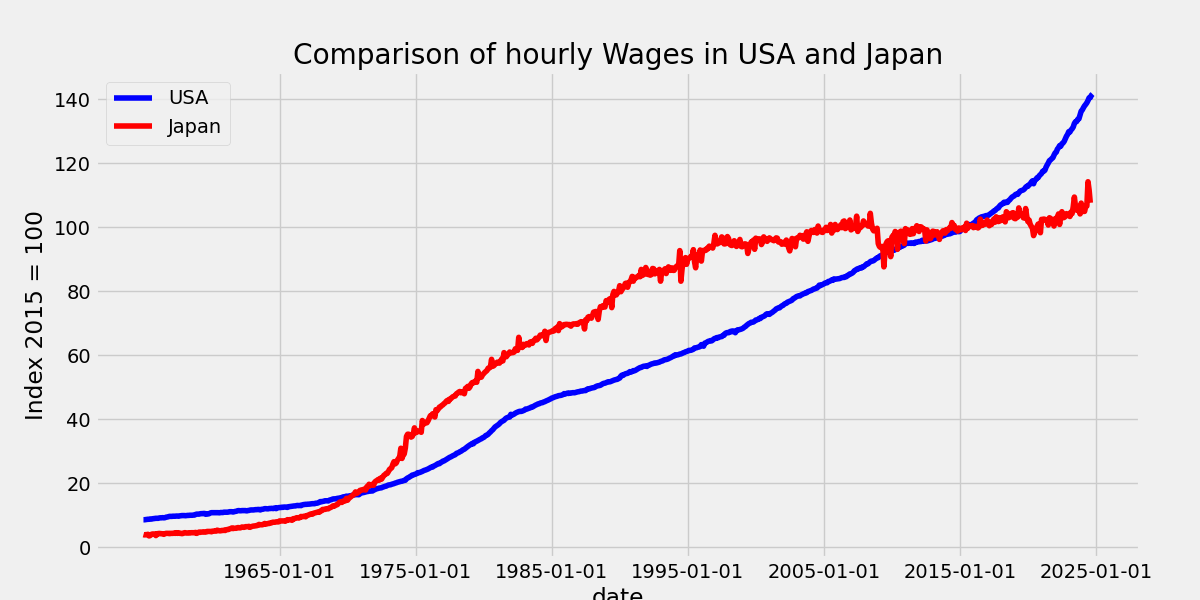

In [8]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,6))
plt.plot(wages_usa["DATE"], wages_usa["USAHOUREAMISMEI"], color="b")
plt.plot(wages_japan["DATE"], wages_japan["LCEAMN01JPM661S"], color="r")


plt.legend(["USA", "Japan"])
plt.ylabel("Index 2015 = 100")
plt.xlabel("date")
plt.title("Comparison of hourly Wages in USA and Japan")
dates = ["1965", "1975", "1985", "1995", "2005", "2015", "2025"]
plt.xticks(dates)

plt.show()

#   GDP

In [9]:
gdp_usa = pd.read_csv("Constant GDP per capita for usa_fed.csv")
gdp_japan = pd.read_csv("Constant GDP per capita for Japan_fed.csv")

In [10]:
gdp_usa

,DATE,NYGDPPCAPKDUSA
0,1960-01-01,18991.544603
1,1961-01-01,19108.935365
2,1962-01-01,19965.143575
3,1963-01-01,20545.784245
4,1964-01-01,21437.584070
...,...,...
59,2019-01-01,61330.645977
60,2020-01-01,59394.778327
61,2021-01-01,62741.001813
62,2022-01-01,63720.764161


In [11]:
new_gdp = pd.DataFrame(np.array([["2024-01-01", 68549]]), columns=["DATE", "NYGDPPCAPKDUSA"], index=[64])
gdp_usa = pd.concat([gdp_usa, new_gdp])
gdp_usa["DATE"] = pd.to_datetime(gdp_usa["DATE"])
gdp_usa

,DATE,NYGDPPCAPKDUSA
0,1960-01-01,18991.544603
1,1961-01-01,19108.935365
2,1962-01-01,19965.143575
3,1963-01-01,20545.784245
4,1964-01-01,21437.58407
...,...,...
60,2020-01-01,59394.778327
61,2021-01-01,62741.001813
62,2022-01-01,63720.764161
63,2023-01-01,65020.352929


In [12]:
gdp_japan

,DATE,NYGDPPCAPKDJPN
0,1960-01-01,6388.878101
1,1961-01-01,7094.470465
2,1962-01-01,7655.055260
3,1963-01-01,8219.987397
4,1964-01-01,9084.795181
...,...,...
59,2019-01-01,36043.784401
60,2020-01-01,34650.796780
61,2021-01-01,35701.454272
62,2022-01-01,36202.639275


In [13]:
new_gdp = pd.DataFrame(np.array([["2024-01-01", 37227.0045]]), columns=["DATE", "NYGDPPCAPKDJPN"], index=[64])
gdp_japan = pd.concat([gdp_japan, new_gdp])
gdp_japan["DATE"] = pd.to_datetime(gdp_japan["DATE"])
gdp_japan

,DATE,NYGDPPCAPKDJPN
0,1960-01-01,6388.878101
1,1961-01-01,7094.470465
2,1962-01-01,7655.05526
3,1963-01-01,8219.987397
4,1964-01-01,9084.795181
...,...,...
60,2020-01-01,34650.79678
61,2021-01-01,35701.454272
62,2022-01-01,36202.639275
63,2023-01-01,37079.10922


In [14]:
gdp_usa["DATE"] = pd.to_datetime(gdp_usa["DATE"])
gdp_japan["DATE"] = pd.to_datetime(gdp_japan["DATE"])

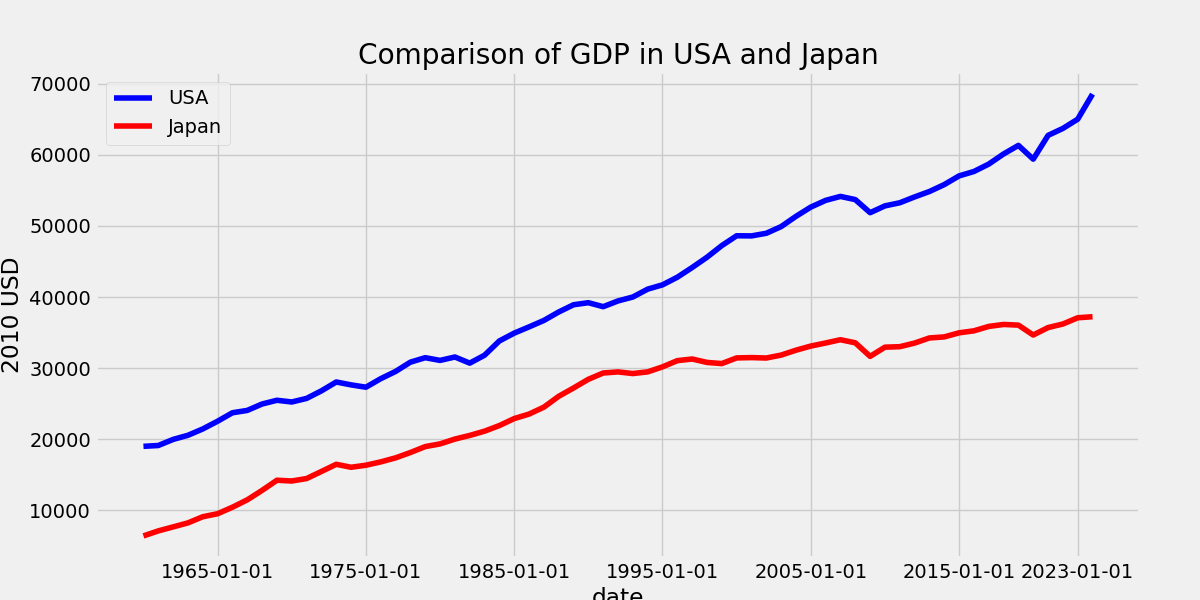

In [15]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,6))
plt.plot(gdp_usa["DATE"], gdp_usa["NYGDPPCAPKDUSA"], color="b")
plt.plot(gdp_japan["DATE"], gdp_japan["NYGDPPCAPKDJPN"], color="r")


plt.legend(["USA", "Japan"])
plt.ylabel("2010 USD")
plt.xlabel("date")
plt.title("Comparison of GDP in USA and Japan")
dates = ["1965", "1975", "1985", "1995", "2005", "2015", "2023"]
plt.xticks(dates)

plt.show()

#   Debt

In [16]:
debt_usa = pd.read_csv("USA DEPT.csv")
debt_japan = pd.read_csv("API_GC.DOD.TOTL.CN_DS2_en_csv_v2_3730.csv")

In [17]:
debt_japan = debt_japan[debt_japan["Country Name"] == "Japan"].drop(["Country Code", "Country Name", "Indicator Name", "Indicator Code", "Unnamed: 68"], axis=1)
debt_japan

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.967026e+14,1.046925e+15,1.051878e+15,1.070136e+15,1.098429e+15,1.104721e+15,1.164666e+15,1.195374e+15,1.210168e+15,NaN


In [18]:
#   extracting the japan - data of world economic set

In [19]:
debt_japan_clean = pd.DataFrame(debt_japan.columns, columns=["Date"])
debt_japan_clean["Debt"] = debt_japan.values.reshape(debt_japan_clean.shape)
debt_japan = debt_japan_clean.dropna().reset_index(drop=True)


In [20]:
debt_japan

,Date,Debt
0,1990,2.399320e+14
1,1991,1.876050e+14
2,1992,1.961940e+14
3,1993,2.124740e+14
4,1994,2.815756e+14
5,1995,3.169909e+14
6,1996,3.503115e+14
7,1997,3.967703e+14
8,1998,4.317639e+14
9,1999,4.787154e+14


In [21]:
new_debt = pd.DataFrame(np.array([[2023,1286000000000000],[2024, 1310400000000000]]), columns=["Date", "Debt"], index=[33,34])
new_debt

,Date,Debt
33,2023,1286000000000000
34,2024,1310400000000000


In [22]:
debt_japan = pd.concat([debt_japan, new_debt])
debt_japan

,Date,Debt
0,1990,2.399320e+14
1,1991,1.876050e+14
2,1992,1.961940e+14
3,1993,2.124740e+14
4,1994,2.815756e+14
5,1995,3.169909e+14
6,1996,3.503115e+14
7,1997,3.967703e+14
8,1998,4.317639e+14
9,1999,4.787154e+14


In [23]:
debt_japan[["Date", "Japan Debt in 100 Billion of Yen"]] = debt_japan[["Date", "Debt"]]
debt_japan.drop("Debt", axis=1, inplace=True)

In [24]:
debt_japan["Japan Debt in 100 Billion of Yen"] = debt_japan["Japan Debt in 100 Billion of Yen"].apply(lambda x: x / 100000000000)

In [25]:
debt_japan.tail()

,Date,Japan Debt in 100 Billion of Yen
30,2020,11646.661
31,2021,11953.742
32,2022,12101.681
33,2023,12860.000
34,2024,13104.000


In [26]:
debt_usa = debt_usa[:35][::-1].reset_index(drop=True)
debt_usa["Record Date"] = pd.to_datetime(debt_usa["Record Date"])
debt_usa["Record Date"] = debt_usa["Record Date"].apply(lambda x: x.strftime("%Y"))



In [27]:
debt_usa

,Record Date,Debt Outstanding Amount
0,1990,3.233313e+12
1,1991,3.665303e+12
2,1992,4.064621e+12
3,1993,4.411489e+12
4,1994,4.692750e+12
5,1995,4.973983e+12
6,1996,5.224811e+12
7,1997,5.413146e+12
8,1998,5.526193e+12
9,1999,5.656271e+12


In [28]:
debt_compare = debt_japan.copy()
debt_compare["USA Debt in 1Billion of USD"] = debt_usa["Debt Outstanding Amount"].apply(lambda x: x / 1000000000)
debt_compare["Date"] = pd.to_datetime(debt_compare["Date"])

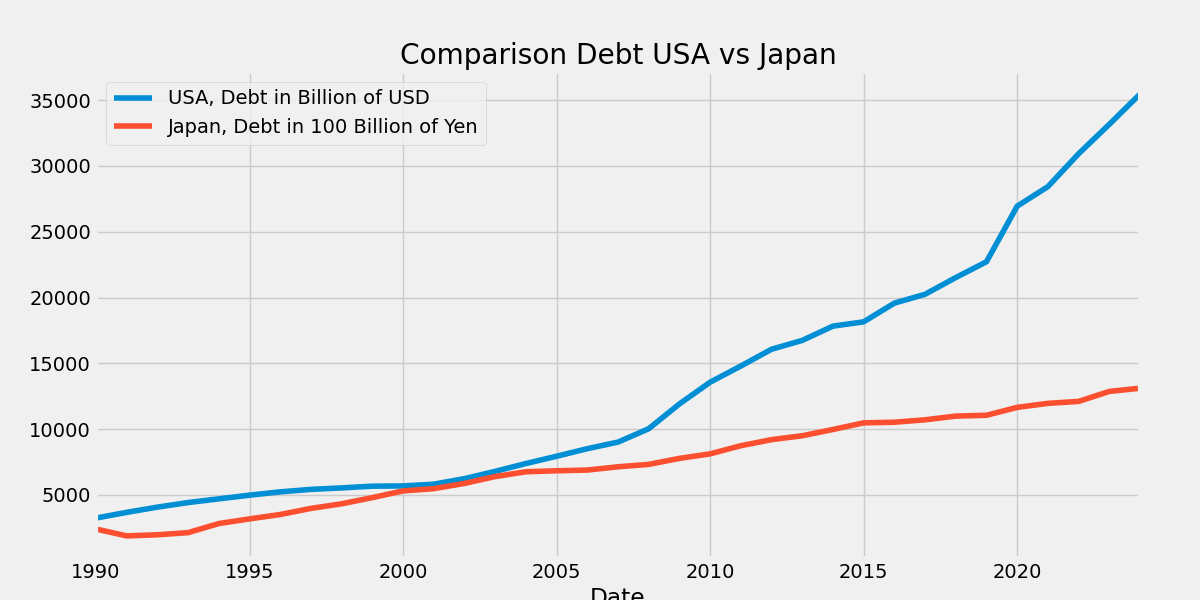

In [29]:
debt_compare.plot(x="Date", y=["USA Debt in 1Billion of USD", "Japan Debt in 100 Billion of Yen"], figsize=(12,6))
plt.title("Comparison Debt USA vs Japan")
plt.legend(["USA, Debt in Billion of USD", "Japan, Debt in 100 Billion of Yen"])

In [30]:
#   TODO: comparison debt to GDP,
#   TODO: comparison CPI

#   Debt to GDP

In [31]:
debt_gdp_usa = pd.read_csv("USA_debt-to-gdp-ratio-historical-chart.csv")
debt_gdp_japan = pd.read_csv("API_GC.DOD.TOTL.GD.ZS_DS2_en_csv_v2_399.csv")

In [32]:
debt_gdp_japan = debt_gdp_japan[debt_gdp_japan["Country Name"] == "Japan"].drop(["Country Code", "Country Name", "Indicator Name", "Indicator Code", "Unnamed: 68"], axis=1)
debt_gdp_japan

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,192.11285,194.584061,193.230438,193.48916,197.335609,198.010309,215.755541,216.329365,216.213375,NaN


In [33]:
debt_gdp_japan_clean = pd.DataFrame(debt_gdp_japan.columns, columns=["Date"])
debt_gdp_japan_clean["Debt"] = debt_gdp_japan.values.reshape(debt_gdp_japan_clean.shape)
debt_gdp_japan = debt_gdp_japan_clean.dropna().reset_index(drop=True)

In [34]:
debt_gdp_japan

,Date,Debt
0,1990,52.012692
1,1991,38.176187
2,1992,38.914934
3,1993,42.115942
4,1994,55.111906
5,1995,60.771222
6,1996,65.410062
7,1997,72.996717
8,1998,80.478284
9,1999,90.653794


In [35]:
debt_gdp_usa["date"] = pd.to_datetime(debt_gdp_usa["date"])

debt_gdp_usa["date"] = debt_gdp_usa["date"].apply(lambda x : x.strftime("%Y"))
debt_gdp_usa.groupby("date").mean().index

Index(['1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024'],
      dtype='object', name='date')

In [36]:
debt_gdp_usa_clean = pd.DataFrame({
    "date": debt_gdp_usa.groupby("date").mean().index,  
    "values": debt_gdp_usa.groupby("date").mean().values.flatten()  
})



In [37]:
debt_gdp_usa_clean.head()

,date,values
0,1966,39.55670
1,1967,38.79000
2,1968,37.42200
3,1969,35.41475
4,1970,35.16925


In [38]:
debt_gdp_usa = debt_gdp_usa_clean
debt_gdp_usa[["Date", "Debt"]] = debt_gdp_usa[["date", "values"]]
debt_gdp_usa.drop(["date", "values"], axis=1, inplace=True)

debt_gdp_usa["Date"] = pd.to_datetime(debt_gdp_usa["Date"])
debt_gdp_japan["Date"] = pd.to_datetime(debt_gdp_japan["Date"])

In [39]:
debt_gdp_japan.tail()

,Date,Debt
28,2018-01-01,197.335609
29,2019-01-01,198.010309
30,2020-01-01,215.755541
31,2021-01-01,216.329365
32,2022-01-01,216.213375


In [40]:
new_gdp = pd.DataFrame(np.array([["2023-01-01", 223.764231], ["2024-01-01", 216.952045]]), columns=["Date", "Debt"], index=[33,34])  # new data from ceicdata.com
debt_gdp_japan = pd.concat([debt_gdp_japan, new_gdp])
debt_gdp_japan["Date"] = pd.to_datetime(debt_gdp_japan["Date"])
debt_gdp_japan.tail()

,Date,Debt
30,2020-01-01,215.755541
31,2021-01-01,216.329365
32,2022-01-01,216.213375
33,2023-01-01,223.764231
34,2024-01-01,216.952045


In [41]:
debt_gdp_usa = debt_gdp_usa[24:].reset_index(drop=True)

In [42]:
debt_gdp_usa.tail()

,Date,Debt
30,2020-01-01,122.42375
31,2021-01-01,121.15650
32,2022-01-01,118.56825
33,2023-01-01,118.08250
34,2024-01-01,120.43500


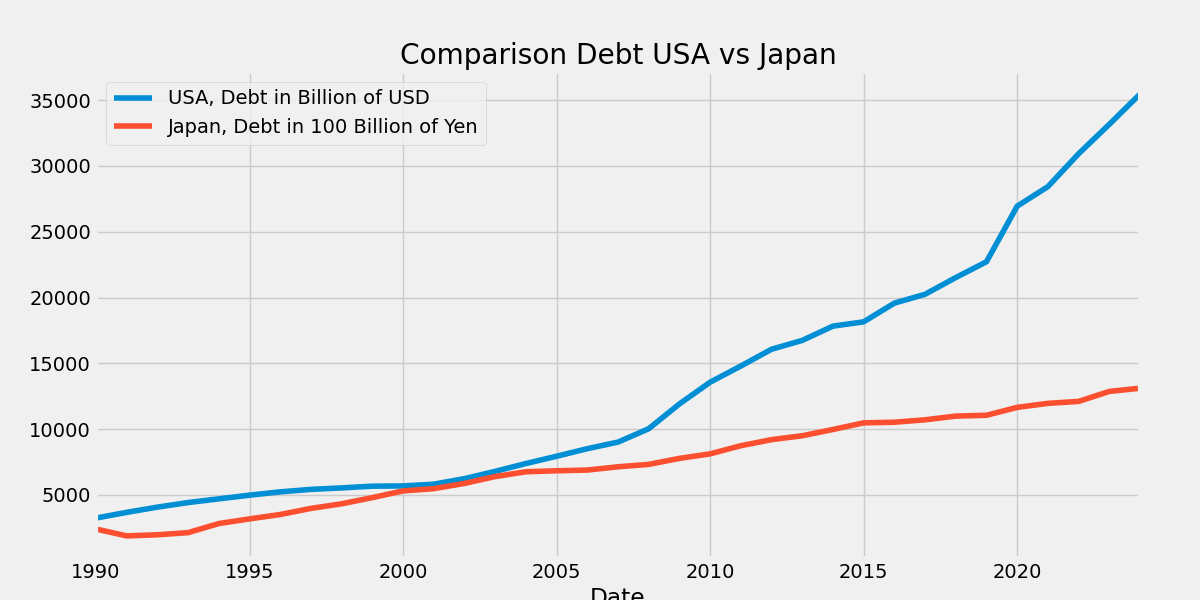

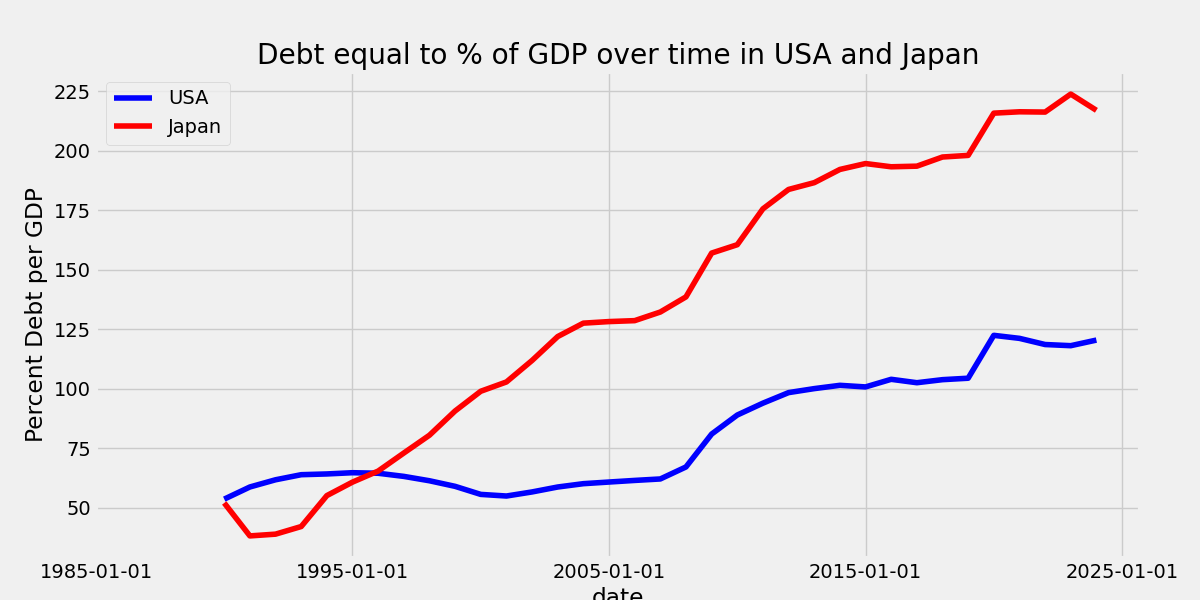

In [43]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,6))
plt.plot(debt_gdp_usa["Date"], debt_gdp_usa["Debt"], color="b")
plt.plot(debt_gdp_japan["Date"], debt_gdp_japan["Debt"], color="r")


plt.legend(["USA", "Japan"])
plt.ylabel("Percent Debt per GDP")
plt.xlabel("date")
plt.title("Debt equal to % of GDP over time in USA and Japan")
dates = ["1985", "1995", "2005", "2015", "2025"]
plt.xticks(dates)

debt_compare.plot(x="Date", y=["USA Debt in 1Billion of USD", "Japan Debt in 100 Billion of Yen"], figsize=(12,6))
plt.title("Comparison Debt USA vs Japan")
plt.legend(["USA, Debt in Billion of USD", "Japan, Debt in 100 Billion of Yen"])

plt.show()

#   CPI

In [44]:
cpi_usa = pd.read_csv("CPI_USA.csv")
cpi_japan = pd.read_csv("CPI_Japan.csv")

In [45]:
#   cutting frame to the same length as japan 
cpi_usa = cpi_usa[276:934]

In [46]:
cpi_japan

,observation_date,CPALCY01JPM661N
0,1970-01-01,31.356579
1,1970-02-01,31.458386
2,1970-03-01,31.763808
3,1970-04-01,32.069229
4,1970-05-01,31.763808
...,...,...
623,2021-12-01,101.908883
624,2022-01-01,102.112497
625,2022-02-01,102.519725
626,2022-03-01,102.926953


In [47]:
#   as a lot of information missing, hardcoding new data from almost the only data  i found, from tradingeconomics

In [48]:
new_data = [["2022-05-01", 101.8],
            ["2022-06-01", 101.8],
            ["2022-07-01", 102.3],
            ["2022-08-01", 102.7],
            ["2022-09-01", 103.1],
            ["2022-10-01", 103.7],
            ["2022-11-01", 103.9],
            ["2022-12-01", 104.1],
            ["2023-01-01", 104.7],
            ["2023-02-01", 104],
            ["2023-03-01", 104.4],
            ["2023-04-01", 105.1],
            ["2023-05-01", 105.1],
            ["2023-06-01", 105.2],
            ["2023-07-01", 105.7],
            ["2023-08-01", 105.9],
            ["2023-09-01", 106.2],
            ["2023-10-01", 107.1],
            ["2023-11-01", 106.9],
            ["2023-12-01", 106.8],
            ["2024-01-01", 106.9],
            ["2024-02-01", 106.9],
            ["2024-03-01", 107.2],
            ["2024-04-01", 107.7],
            ["2024-05-01", 108.1],
            ["2024-06-01", 108.2],
            ["2024-07-01", 108.6], 
            ["2024-08-01", 109.1], 
            ["2024-09-01", 108.9], 
            ["2024-10-01", 109.5]]


In [49]:
df = pd.DataFrame(new_data, columns=["observation_date", "CPALCY01JPM661N"])

In [50]:
df.head()


,observation_date,CPALCY01JPM661N
0,2022-05-01,101.8
1,2022-06-01,101.8
2,2022-07-01,102.3
3,2022-08-01,102.7
4,2022-09-01,103.1


In [51]:
cpi_japan = pd.concat([cpi_japan, df]).reset_index(drop=True)
cpi_japan

,observation_date,CPALCY01JPM661N
0,1970-01-01,31.356579
1,1970-02-01,31.458386
2,1970-03-01,31.763808
3,1970-04-01,32.069229
4,1970-05-01,31.763808
...,...,...
653,2024-06-01,108.200000
654,2024-07-01,108.600000
655,2024-08-01,109.100000
656,2024-09-01,108.900000


In [52]:
cpi_usa[["Date", "Price"]] = cpi_usa[["observation_date", "CPIAUCSL"]]
cpi_usa.drop(["observation_date", "CPIAUCSL"], axis=1, inplace=True)

cpi_japan[["Date", "Price"]] = cpi_japan[["observation_date", "CPALCY01JPM661N"]]
cpi_japan.drop(["observation_date", "CPALCY01JPM661N"], axis=1, inplace=True)

In [53]:
cpi_usa["Date"] = pd.to_datetime(cpi_usa["Date"])
cpi_japan["Date"] = pd.to_datetime(cpi_japan["Date"])

cpi_usa.reset_index(drop=True)

,Date,Price
0,1970-01-01,37.900
1,1970-02-01,38.100
2,1970-03-01,38.300
3,1970-04-01,38.500
4,1970-05-01,38.600
...,...,...
653,2024-06-01,313.049
654,2024-07-01,313.534
655,2024-08-01,314.121
656,2024-09-01,314.686


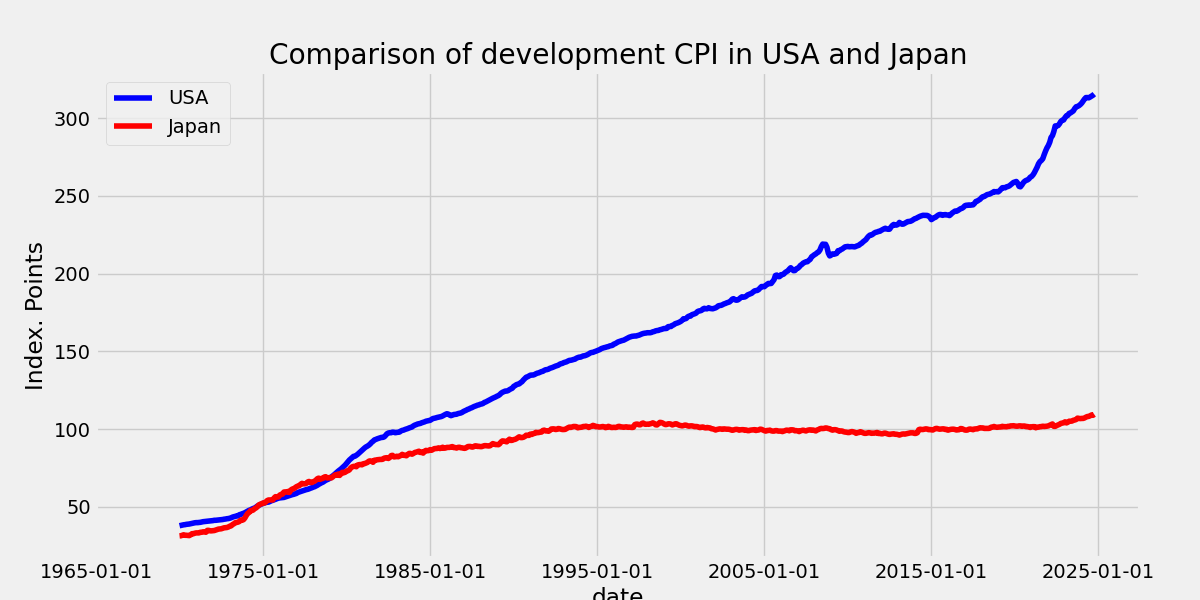

In [54]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,6))
plt.plot(cpi_usa["Date"], cpi_usa["Price"], color="b")
plt.plot(cpi_japan["Date"], cpi_japan["Price"], color="r")


plt.legend(["USA", "Japan"])
plt.ylabel("Index. Points")
plt.xlabel("date")
plt.title("Comparison of development CPI in USA and Japan")
dates = ["1965", "1975", "1985", "1995", "2005", "2015", "2025"]
plt.xticks(dates)

plt.show()

#   Data combining, feature engineering

In [55]:
#   cleaning data and giving understandable names, etc.. Scaling not yet included

In [56]:
all_data = [cpi_usa.copy(), cpi_japan.copy(), wages_usa.copy(), wages_japan.copy(), gdp_usa.copy(), gdp_japan.copy(), debt_compare.copy(), debt_gdp_usa.copy(), debt_gdp_japan.copy()]

In [57]:
all_data[0]["CPI_USA_Index"] = all_data[0]["Price"]
all_data[0] = all_data[0].drop(["Price"], axis=1)
all_data[0]

,Date,CPI_USA_Index
276,1970-01-01,37.900
277,1970-02-01,38.100
278,1970-03-01,38.300
279,1970-04-01,38.500
280,1970-05-01,38.600
...,...,...
929,2024-06-01,313.049
930,2024-07-01,313.534
931,2024-08-01,314.121
932,2024-09-01,314.686


In [58]:
print(all_data[0].isna().sum())
print(all_data[0].dtypes)

Date             0
CPI_USA_Index    0
dtype: int64
Date             datetime64[ns]
CPI_USA_Index           float64
dtype: object


In [59]:
all_data[1]["CPI_Japan_Index"] = all_data[1]["Price"]
all_data[1] = all_data[1].drop(["Price"], axis=1)
all_data[1]

,Date,CPI_Japan_Index
0,1970-01-01,31.356579
1,1970-02-01,31.458386
2,1970-03-01,31.763808
3,1970-04-01,32.069229
4,1970-05-01,31.763808
...,...,...
653,2024-06-01,108.200000
654,2024-07-01,108.600000
655,2024-08-01,109.100000
656,2024-09-01,108.900000


In [60]:
print(all_data[1].isna().sum())
print(all_data[1].dtypes)

Date               0
CPI_Japan_Index    0
dtype: int64
Date               datetime64[ns]
CPI_Japan_Index           float64
dtype: object


In [61]:
all_data[2].rename(columns={"DATE": "Date", "USAHOUREAMISMEI": "USA_WageH_Dollar"}, inplace=True)

In [62]:
all_data[2]

,Date,USA_WageH_Dollar
0,1955-01-01,8.541283
1,1955-02-01,8.541283
2,1955-03-01,8.591526
3,1955-04-01,8.641768
4,1955-05-01,8.692012
...,...,...
833,2024-06-01,139.624800
834,2024-07-01,140.479000
835,2024-08-01,140.529200
836,2024-09-01,141.282900


In [63]:
print(all_data[2].isna().sum())
print(all_data[2].dtypes)

Date                0
USA_WageH_Dollar    0
dtype: int64
Date                datetime64[ns]
USA_WageH_Dollar           float64
dtype: object


In [64]:
all_data[3].rename(columns={"DATE": "Date", "LCEAMN01JPM661S": "Japan_WageH_Dollar"}, inplace=True)
all_data[3]

,Date,Japan_WageH_Dollar
0,1955-01-01,3.887366
1,1955-02-01,3.787690
2,1955-03-01,3.887366
3,1955-04-01,3.887366
4,1955-05-01,3.987042
...,...,...
831,2024-04-01,106.553700
832,2024-05-01,106.653400
833,2024-06-01,114.228800
834,2024-07-01,111.637200


In [65]:
print(all_data[3].isna().sum())
print(all_data[3].dtypes)

Date                  0
Japan_WageH_Dollar    0
dtype: int64
Date                  datetime64[ns]
Japan_WageH_Dollar           float64
dtype: object


In [66]:
all_data[4]

,DATE,NYGDPPCAPKDUSA
0,1960-01-01,18991.544603
1,1961-01-01,19108.935365
2,1962-01-01,19965.143575
3,1963-01-01,20545.784245
4,1964-01-01,21437.58407
...,...,...
60,2020-01-01,59394.778327
61,2021-01-01,62741.001813
62,2022-01-01,63720.764161
63,2023-01-01,65020.352929


In [67]:
all_data[4].rename(columns={"DATE": "Date", "NYGDPPCAPKDUSA": "USA_GDP_Dollar_Capita"}, inplace=True)
all_data[4]["USA_GDP_Dollar_Capita"] = all_data[4]["USA_GDP_Dollar_Capita"].apply(lambda x:float(x))
all_data[4]

,Date,USA_GDP_Dollar_Capita
0,1960-01-01,18991.544603
1,1961-01-01,19108.935365
2,1962-01-01,19965.143575
3,1963-01-01,20545.784245
4,1964-01-01,21437.584070
...,...,...
60,2020-01-01,59394.778327
61,2021-01-01,62741.001813
62,2022-01-01,63720.764161
63,2023-01-01,65020.352929


In [68]:
print(all_data[4].isna().sum())
print(all_data[4].dtypes)

Date                     0
USA_GDP_Dollar_Capita    0
dtype: int64
Date                     datetime64[ns]
USA_GDP_Dollar_Capita           float64
dtype: object


In [69]:
all_data[5]

,DATE,NYGDPPCAPKDJPN
0,1960-01-01,6388.878101
1,1961-01-01,7094.470465
2,1962-01-01,7655.05526
3,1963-01-01,8219.987397
4,1964-01-01,9084.795181
...,...,...
60,2020-01-01,34650.79678
61,2021-01-01,35701.454272
62,2022-01-01,36202.639275
63,2023-01-01,37079.10922


In [70]:
all_data[5].rename(columns={"DATE": "Date", "NYGDPPCAPKDJPN": "Japan_GDP_Dollar_Capita"}, inplace=True)
all_data[5]["Japan_GDP_Dollar_Capita"] = all_data[5]["Japan_GDP_Dollar_Capita"].apply(lambda x:float(x))
all_data[5]

,Date,Japan_GDP_Dollar_Capita
0,1960-01-01,6388.878101
1,1961-01-01,7094.470465
2,1962-01-01,7655.055260
3,1963-01-01,8219.987397
4,1964-01-01,9084.795181
...,...,...
60,2020-01-01,34650.796780
61,2021-01-01,35701.454272
62,2022-01-01,36202.639275
63,2023-01-01,37079.109220


In [71]:
print(all_data[5].isna().sum())
print(all_data[5].dtypes)

Date                       0
Japan_GDP_Dollar_Capita    0
dtype: int64
Date                       datetime64[ns]
Japan_GDP_Dollar_Capita           float64
dtype: object


In [72]:
all_data[6].dtypes
all_data[6].isna().sum()

Date                                0
Japan Debt in 100 Billion of Yen    0
USA Debt in 1Billion of USD         0
dtype: int64

In [73]:
all_data[6]

,Date,Japan Debt in 100 Billion of Yen,USA Debt in 1Billion of USD
0,1990-01-01,2399.320,3233.313452
1,1991-01-01,1876.050,3665.303352
2,1992-01-01,1961.940,4064.620656
3,1993-01-01,2124.740,4411.488883
4,1994-01-01,2815.756,4692.749910
5,1995-01-01,3169.909,4973.982901
6,1996-01-01,3503.115,5224.810939
7,1997-01-01,3967.703,5413.146011
8,1998-01-01,4317.639,5526.193009
9,1999-01-01,4787.154,5656.270902


In [74]:
all_data[7].rename(columns={"Debt": "USA_%_Debt_to_GDP"}, inplace=True)
all_data[7]

,Date,USA_%_Debt_to_GDP
0,1990-01-01,53.62625
1,1991-01-01,58.72750
2,1992-01-01,61.74925
3,1993-01-01,63.88800
4,1994-01-01,64.20300
5,1995-01-01,64.72450
6,1996-01-01,64.49850
7,1997-01-01,63.17750
8,1998-01-01,61.33900
9,1999-01-01,58.99425


In [75]:
all_data[8].rename(columns={"Debt": "Japan_%_Debt_to_GDP"}, inplace=True)
all_data[8]["Japan_%_Debt_to_GDP"] = all_data[8]["Japan_%_Debt_to_GDP"].apply(lambda x:float(x))
all_data[8]

,Date,Japan_%_Debt_to_GDP
0,1990-01-01,52.012692
1,1991-01-01,38.176187
2,1992-01-01,38.914934
3,1993-01-01,42.115942
4,1994-01-01,55.111906
5,1995-01-01,60.771222
6,1996-01-01,65.410062
7,1997-01-01,72.996717
8,1998-01-01,80.478284
9,1999-01-01,90.653794


In [76]:
#   concatinate the tables into all in one table. WIll be some of nan values because the monthly data is abscent in most tables.

In [77]:
all_data

[          Date  CPI_USA_Index
 276 1970-01-01         37.900
 277 1970-02-01         38.100
 278 1970-03-01         38.300
 279 1970-04-01         38.500
 280 1970-05-01         38.600
 ..         ...            ...
 929 2024-06-01        313.049
 930 2024-07-01        313.534
 931 2024-08-01        314.121
 932 2024-09-01        314.686
 933 2024-10-01        315.454
 
 [658 rows x 2 columns],
           Date  CPI_Japan_Index
 0   1970-01-01        31.356579
 1   1970-02-01        31.458386
 2   1970-03-01        31.763808
 3   1970-04-01        32.069229
 4   1970-05-01        31.763808
 ..         ...              ...
 653 2024-06-01       108.200000
 654 2024-07-01       108.600000
 655 2024-08-01       109.100000
 656 2024-09-01       108.900000
 657 2024-10-01       109.500000
 
 [658 rows x 2 columns],
           Date  USA_WageH_Dollar
 0   1955-01-01          8.541283
 1   1955-02-01          8.541283
 2   1955-03-01          8.591526
 3   1955-04-01          8.641768
 4   195

In [78]:
#   for easier concatinating i conver date to index

In [79]:
for table in all_data:
    table.set_index("Date", inplace=True)
    print(table)

            CPI_USA_Index
Date                     
1970-01-01         37.900
1970-02-01         38.100
1970-03-01         38.300
1970-04-01         38.500
1970-05-01         38.600
...                   ...
2024-06-01        313.049
2024-07-01        313.534
2024-08-01        314.121
2024-09-01        314.686
2024-10-01        315.454

[658 rows x 1 columns]
            CPI_Japan_Index
Date                       
1970-01-01        31.356579
1970-02-01        31.458386
1970-03-01        31.763808
1970-04-01        32.069229
1970-05-01        31.763808
...                     ...
2024-06-01       108.200000
2024-07-01       108.600000
2024-08-01       109.100000
2024-09-01       108.900000
2024-10-01       109.500000

[658 rows x 1 columns]
            USA_WageH_Dollar
Date                        
1955-01-01          8.541283
1955-02-01          8.541283
1955-03-01          8.591526
1955-04-01          8.641768
1955-05-01          8.692012
...                      ...
2024-06-01        

In [80]:
all_data[8]

,Japan_%_Debt_to_GDP
Date,
1990-01-01,52.012692
1991-01-01,38.176187
1992-01-01,38.914934
1993-01-01,42.115942
1994-01-01,55.111906
1995-01-01,60.771222
1996-01-01,65.410062
1997-01-01,72.996717
1998-01-01,80.478284


In [81]:
full_df = pd.concat([all_data[0], all_data[1], all_data[2], all_data[3], all_data[4], all_data[5], all_data[6], all_data[7], all_data[8]], axis=1)
full_df[180:].head(10)

,CPI_USA_Index,CPI_Japan_Index,USA_WageH_Dollar,Japan_WageH_Dollar,USA_GDP_Dollar_Capita,Japan_GDP_Dollar_Capita,Japan Debt in 100 Billion of Yen,USA Debt in 1Billion of USD,USA_%_Debt_to_GDP,Japan_%_Debt_to_GDP
Date,,,,,,,,,,
1970-01-01,37.9,31.356579,15.87674,14.65238,25231.127158,14114.315818,NaN,NaN,NaN,NaN
1970-02-01,38.1,31.458386,15.92698,15.25044,NaN,NaN,NaN,NaN,NaN,NaN
1970-03-01,38.3,31.763808,16.02747,15.44979,NaN,NaN,NaN,NaN,NaN,NaN
1970-04-01,38.5,32.069229,16.02747,15.74882,NaN,NaN,NaN,NaN,NaN,NaN
1970-05-01,38.6,31.763808,16.17819,16.04784,NaN,NaN,NaN,NaN,NaN,NaN
1970-06-01,38.8,31.763808,16.27868,16.24720,NaN,NaN,NaN,NaN,NaN,NaN
1970-07-01,38.9,31.662001,16.32892,16.64590,NaN,NaN,NaN,NaN,NaN,NaN
1970-08-01,39.0,31.560193,16.37917,17.24396,NaN,NaN,NaN,NaN,NaN,NaN
1970-09-01,39.2,32.069229,16.52989,16.74558,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#   i take the data than from 1970! the rest of data should be irrelevant

In [83]:
full_df = full_df[180:]

In [84]:
#   there are a lot of missing values, because we combine monthly data with yearly data.

In [85]:
#   filling the gaps. I choose to fill the gabs with nearest numbers, alternatively one could do that by creating same distance numbers between two values (maybe that would be better for ML), but it is in any case not that important for the big picture!

In [86]:
#   the last (most resent values are simply values from last datapoint (in this case January 2024))
#   !!!     this can of course impact the results for near forecasting etc..

In [87]:
full_df.dtypes

CPI_USA_Index                       float64
CPI_Japan_Index                     float64
USA_WageH_Dollar                    float64
Japan_WageH_Dollar                  float64
USA_GDP_Dollar_Capita               float64
Japan_GDP_Dollar_Capita             float64
Japan Debt in 100 Billion of Yen    float64
USA Debt in 1Billion of USD         float64
USA_%_Debt_to_GDP                   float64
Japan_%_Debt_to_GDP                 float64
dtype: object

In [88]:
full_df["USA_GDP_Dollar_Capita"] = full_df["USA_GDP_Dollar_Capita"].interpolate(method="nearest")

In [89]:
full_df["Japan_GDP_Dollar_Capita"] = full_df["Japan_GDP_Dollar_Capita"].interpolate(method="nearest")
full_df["Japan Debt in 100 Billion of Yen"] = full_df["Japan Debt in 100 Billion of Yen"].interpolate(method="nearest")
full_df["USA Debt in 1Billion of USD"] = full_df["USA Debt in 1Billion of USD"].interpolate(method="nearest")
full_df["USA_%_Debt_to_GDP"] = full_df["USA_%_Debt_to_GDP"].interpolate(method="nearest")
full_df["Japan_%_Debt_to_GDP"] = full_df["Japan_%_Debt_to_GDP"].interpolate(method="nearest")

In [90]:
full_df.tail(10)

,CPI_USA_Index,CPI_Japan_Index,USA_WageH_Dollar,Japan_WageH_Dollar,USA_GDP_Dollar_Capita,Japan_GDP_Dollar_Capita,Japan Debt in 100 Billion of Yen,USA Debt in 1Billion of USD,USA_%_Debt_to_GDP,Japan_%_Debt_to_GDP
Date,,,,,,,,,,
2024-01-01,309.685,106.9,136.7108,104.9589,68549.0,37227.0045,13104.0,35464.673929,120.435,216.952045
2024-02-01,311.054,106.9,137.4142,104.9589,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-01,312.230,107.2,137.9668,104.9589,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01,313.207,107.7,138.4190,106.5537,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-01,313.225,108.1,138.9214,106.6534,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-01,313.049,108.2,139.6248,114.2288,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01,313.534,108.6,140.4790,111.6372,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-01,314.121,109.1,140.5292,107.6501,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-01,314.686,108.9,141.2829,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
full_df["Japan_WageH_Dollar"] = full_df["Japan_WageH_Dollar"].fillna(107.6501)
full_df["Japan_WageH_Dollar"].tail(5)

Date
2024-06-01    114.2288
2024-07-01    111.6372
2024-08-01    107.6501
2024-09-01    107.6501
2024-10-01    107.6501
Freq: MS, Name: Japan_WageH_Dollar, dtype: float64

In [92]:
full_df["Japan_GDP_Dollar_Capita"][600:] = full_df["Japan_GDP_Dollar_Capita"][600:].fillna(37227.0045)
full_df["Japan Debt in 100 Billion of Yen"][600:] = full_df["Japan Debt in 100 Billion of Yen"][600:].fillna(13104.0)
full_df["USA Debt in 1Billion of USD"][600:] = full_df["USA Debt in 1Billion of USD"][600:].fillna(35464.673929)
full_df["USA_%_Debt_to_GDP"][600:] = full_df["USA_%_Debt_to_GDP"][600:].fillna(120.435)
full_df["Japan_%_Debt_to_GDP"][600:] = full_df["Japan_%_Debt_to_GDP"][600:].fillna(216.952045)
full_df.head(50)

C:\Users\V. Stasiunaitis\AppData\Local\Temp\ipykernel_15568\2179877904.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  full_df["Japan_GDP_Dollar_Capita"][600:] = full_df["Japan_GDP_Dollar_Capita"][600:].fillna(37227.0045)
C:\Users\V. Sta

,CPI_USA_Index,CPI_Japan_Index,USA_WageH_Dollar,Japan_WageH_Dollar,USA_GDP_Dollar_Capita,Japan_GDP_Dollar_Capita,Japan Debt in 100 Billion of Yen,USA Debt in 1Billion of USD,USA_%_Debt_to_GDP,Japan_%_Debt_to_GDP
Date,,,,,,,,,,
1970-01-01,37.9,31.356579,15.87674,14.65238,25231.127158,14114.315818,NaN,NaN,NaN,NaN
1970-02-01,38.1,31.458386,15.92698,15.25044,25231.127158,14114.315818,NaN,NaN,NaN,NaN
1970-03-01,38.3,31.763808,16.02747,15.44979,25231.127158,14114.315818,NaN,NaN,NaN,NaN
1970-04-01,38.5,32.069229,16.02747,15.74882,25231.127158,14114.315818,NaN,NaN,NaN,NaN
1970-05-01,38.6,31.763808,16.17819,16.04784,25231.127158,14114.315818,NaN,NaN,NaN,NaN
1970-06-01,38.8,31.763808,16.27868,16.24720,25231.127158,14114.315818,NaN,NaN,NaN,NaN
1970-07-01,38.9,31.662001,16.32892,16.64590,25231.127158,14114.315818,NaN,NaN,NaN,NaN
1970-08-01,39.0,31.560193,16.37917,17.24396,25734.482835,14456.821195,NaN,NaN,NaN,NaN
1970-09-01,39.2,32.069229,16.52989,16.74558,25734.482835,14456.821195,NaN,NaN,NaN,NaN


In [93]:
full_df["USA_GDP_Dollar_Capita"][600:] = full_df["USA_GDP_Dollar_Capita"][600:].fillna(68549.0)
full_df[["CPI_USA_Index", "USA_GDP_Dollar_Capita"]].tail(20)

C:\Users\V. Stasiunaitis\AppData\Local\Temp\ipykernel_15568\117633788.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  full_df["USA_GDP_Dollar_Capita"][600:] = full_df["USA_GDP_Dollar_Capita"][600:].fillna(68549.0)


,CPI_USA_Index,USA_GDP_Dollar_Capita
Date,,
2023-03-01,301.744,65020.352929
2023-04-01,303.032,65020.352929
2023-05-01,303.365,65020.352929
2023-06-01,304.003,65020.352929
2023-07-01,304.628,65020.352929
2023-08-01,306.187,68549.000000
2023-09-01,307.288,68549.000000
2023-10-01,307.531,68549.000000
2023-11-01,308.024,68549.000000


In [94]:
full_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CPI_USA_Index,658.0,159.845728,74.734768,37.900000,100.500000,160.050000,221.720250,315.454000
CPI_Japan_Index,658.0,88.602797,19.895969,31.356579,83.812675,98.854670,101.094426,109.500000
USA_WageH_Dollar,658.0,68.156551,31.999485,15.876740,44.062973,65.717635,94.958970,141.634600
Japan_WageH_Dollar,658.0,80.027903,25.578884,14.652380,64.615000,93.645650,99.377020,114.228800
USA_GDP_Dollar_Capita,658.0,44667.680548,12038.843444,25231.127158,33818.823551,44151.686041,54080.228650,68549.000000
Japan_GDP_Dollar_Capita,658.0,28196.836016,7010.055452,14114.315818,21912.151862,30795.088890,33557.645404,37227.004500
Japan Debt in 100 Billion of Yen,418.0,7457.871397,3398.551531,1876.050000,4787.154000,7130.493000,10518.781000,13104.000000
USA Debt in 1Billion of USD,418.0,13485.789419,9404.793476,3233.313452,5656.270902,9007.653372,19573.444714,35464.673929
USA_%_Debt_to_GDP,418.0,81.533210,23.750961,53.626250,61.339000,64.724500,102.526000,122.423750
Japan_%_Debt_to_GDP,418.0,138.976903,59.908616,38.176187,90.653794,132.222046,193.489160,223.764231


In [95]:
#   now i decide to make two main dataframes, because there are two main datablocks one from 1970, another from 1990.

In [96]:
full_df[240:]

,CPI_USA_Index,CPI_Japan_Index,USA_WageH_Dollar,Japan_WageH_Dollar,USA_GDP_Dollar_Capita,Japan_GDP_Dollar_Capita,Japan Debt in 100 Billion of Yen,USA Debt in 1Billion of USD,USA_%_Debt_to_GDP,Japan_%_Debt_to_GDP
Date,,,,,,,,,,
1990-01-01,127.500,93.255281,52.85547,81.73436,39200.065811,28422.21312,2399.32,3233.313452,53.62625,52.012692
1990-02-01,128.000,93.458895,53.45838,79.84052,39200.065811,28422.21312,2399.32,3233.313452,53.62625,52.012692
1990-03-01,128.600,93.866124,53.75984,80.43858,39200.065811,28422.21312,2399.32,3233.313452,53.62625,52.012692
1990-04-01,128.900,94.476966,53.65936,80.93696,39200.065811,28422.21312,2399.32,3233.313452,53.62625,52.012692
1990-05-01,129.100,95.087809,53.96081,81.53501,39200.065811,28422.21312,2399.32,3233.313452,53.62625,52.012692
...,...,...,...,...,...,...,...,...,...,...
2024-06-01,313.049,108.200000,139.62480,114.22880,68549.000000,37227.00450,13104.00,35464.673929,120.43500,216.952045
2024-07-01,313.534,108.600000,140.47900,111.63720,68549.000000,37227.00450,13104.00,35464.673929,120.43500,216.952045
2024-08-01,314.121,109.100000,140.52920,107.65010,68549.000000,37227.00450,13104.00,35464.673929,120.43500,216.952045


In [97]:
full_df1 = full_df[240:]

In [98]:
full_df2 = full_df.drop(["Japan Debt in 100 Billion of Yen",	"USA Debt in 1Billion of USD",	"USA_%_Debt_to_GDP",	"Japan_%_Debt_to_GDP"], axis=1)

In [99]:
full_df2.isnull().sum()

CPI_USA_Index              0
CPI_Japan_Index            0
USA_WageH_Dollar           0
Japan_WageH_Dollar         0
USA_GDP_Dollar_Capita      0
Japan_GDP_Dollar_Capita    0
dtype: int64

In [100]:
full_df1.isnull().sum()

CPI_USA_Index                       0
CPI_Japan_Index                     0
USA_WageH_Dollar                    0
Japan_WageH_Dollar                  0
USA_GDP_Dollar_Capita               0
Japan_GDP_Dollar_Capita             0
Japan Debt in 100 Billion of Yen    0
USA Debt in 1Billion of USD         0
USA_%_Debt_to_GDP                   0
Japan_%_Debt_to_GDP                 0
dtype: int64

In [101]:
full_df1

,CPI_USA_Index,CPI_Japan_Index,USA_WageH_Dollar,Japan_WageH_Dollar,USA_GDP_Dollar_Capita,Japan_GDP_Dollar_Capita,Japan Debt in 100 Billion of Yen,USA Debt in 1Billion of USD,USA_%_Debt_to_GDP,Japan_%_Debt_to_GDP
Date,,,,,,,,,,
1990-01-01,127.500,93.255281,52.85547,81.73436,39200.065811,28422.21312,2399.32,3233.313452,53.62625,52.012692
1990-02-01,128.000,93.458895,53.45838,79.84052,39200.065811,28422.21312,2399.32,3233.313452,53.62625,52.012692
1990-03-01,128.600,93.866124,53.75984,80.43858,39200.065811,28422.21312,2399.32,3233.313452,53.62625,52.012692
1990-04-01,128.900,94.476966,53.65936,80.93696,39200.065811,28422.21312,2399.32,3233.313452,53.62625,52.012692
1990-05-01,129.100,95.087809,53.96081,81.53501,39200.065811,28422.21312,2399.32,3233.313452,53.62625,52.012692
...,...,...,...,...,...,...,...,...,...,...
2024-06-01,313.049,108.200000,139.62480,114.22880,68549.000000,37227.00450,13104.00,35464.673929,120.43500,216.952045
2024-07-01,313.534,108.600000,140.47900,111.63720,68549.000000,37227.00450,13104.00,35464.673929,120.43500,216.952045
2024-08-01,314.121,109.100000,140.52920,107.65010,68549.000000,37227.00450,13104.00,35464.673929,120.43500,216.952045


In [102]:
full_df1.corr("spearman")

,CPI_USA_Index,CPI_Japan_Index,USA_WageH_Dollar,Japan_WageH_Dollar,USA_GDP_Dollar_Capita,Japan_GDP_Dollar_Capita,Japan Debt in 100 Billion of Yen,USA Debt in 1Billion of USD,USA_%_Debt_to_GDP,Japan_%_Debt_to_GDP
CPI_USA_Index,1.000000,0.159015,0.999550,0.904556,0.988187,0.969318,0.998315,0.999155,0.834480,0.996729
CPI_Japan_Index,0.159015,1.000000,0.156719,0.198988,0.158271,0.137057,0.151662,0.156608,0.197956,0.150617
USA_WageH_Dollar,0.999550,0.156719,1.000000,0.900418,0.987722,0.968534,0.998661,0.999502,0.834791,0.997125
Japan_WageH_Dollar,0.904556,0.198988,0.900418,1.000000,0.930186,0.937723,0.899073,0.899965,0.691833,0.895389
USA_GDP_Dollar_Capita,0.988187,0.158271,0.987722,0.930186,1.000000,0.988621,0.987921,0.988202,0.806388,0.986385
Japan_GDP_Dollar_Capita,0.969318,0.137057,0.968534,0.937723,0.988621,1.000000,0.968136,0.969011,0.779477,0.965463
Japan Debt in 100 Billion of Yen,0.998315,0.151662,0.998661,0.899073,0.987921,0.968136,1.000000,0.999092,0.830302,0.998464
USA Debt in 1Billion of USD,0.999155,0.156608,0.999502,0.899965,0.988202,0.969011,0.999092,1.000000,0.835158,0.997556
USA_%_Debt_to_GDP,0.834480,0.197956,0.834791,0.691833,0.806388,0.779477,0.830302,0.835158,1.000000,0.828482
Japan_%_Debt_to_GDP,0.996729,0.150617,0.997125,0.895389,0.986385,0.965463,0.998464,0.997556,0.828482,1.000000


In [103]:
import seaborn as sns
sns.heatmap(data=full_df1.corr("spearman"),annot=True)

<Axes: title={'center': 'Comparison of development CPI in USA and Japan'}>

In [104]:
full_df2.corr("spearman")

,CPI_USA_Index,CPI_Japan_Index,USA_WageH_Dollar,Japan_WageH_Dollar,USA_GDP_Dollar_Capita,Japan_GDP_Dollar_Capita
CPI_USA_Index,1.000000,0.784376,0.999879,0.975481,0.995634,0.991857
CPI_Japan_Index,0.784376,1.000000,0.783789,0.794573,0.782774,0.778516
USA_WageH_Dollar,0.999879,0.783789,1.000000,0.974419,0.995516,0.991656
Japan_WageH_Dollar,0.975481,0.794573,0.974419,1.000000,0.980737,0.983720
USA_GDP_Dollar_Capita,0.995634,0.782774,0.995516,0.980737,1.000000,0.995923
Japan_GDP_Dollar_Capita,0.991857,0.778516,0.991656,0.983720,0.995923,1.000000


In [105]:
sns.heatmap(data=full_df2.corr("spearman"),annot=True)

<Axes: title={'center': 'Comparison of development CPI in USA and Japan'}>

In [106]:
full_df1.to_csv("country_df1.csv", index=True)
full_df2.to_csv("country_df2.csv", index=True)